### 画一些论文里用到的图

#### 1. pipeline: 画一下函数拟合的两步

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',  # 使用衬线字体
    'font.serif': ['Times New Roman'],  # 指定 Times New Roman 字体
    'font.size': 12,
    'text.usetex': False,
    'axes.labelsize': 13.5,
    'axes.titlesize': 15,
    'xtick.labelsize': 13.5,
    'ytick.labelsize': 13.5,
    'legend.fontsize': 11.5,
    'legend.title_fontsize': 12,
    'savefig.bbox': 'tight',
})
sns.set_style("whitegrid")
flierprops = dict(marker='o', markersize=2, linestyle='none')

In [3]:
import os
import pandas as pd
size_map = {
    "2160P": "3840x2160",
    "1080P": "1920x1080",
    "720P": "1280x720",
    "540P": "960x540",
    "360P": "640x360",
}
fig_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/figs"
table_dir = "/home/zhaoy/asset-fastCAE/results/vvenc/tables"

os.makedirs(f"{fig_dir}/BDBR/final", exist_ok=True)

In [4]:
enc_df = pd.read_csv(f"{table_dir}/encInfo.csv")
display(enc_df)

,seqName,sceneId,qp,preset,size,nframes,bitrate,psnr,ssim,vmaf,log2psnr,log2ssim,log2bitrate,log2vmaf,bpp
0,Lecture-1033,0,32,faster,360P,281,57.8571,47.754628,0.997213,95.285921,5.577569,-0.004026,5.854422,6.574191,0.008371
1,Lecture-1033,2,27,faster,360P,285,190.5078,49.755053,0.995836,95.477799,5.636771,-0.006020,7.573706,6.577093,0.027562
2,Lecture-1033,1,42,faster,360P,35,39.2434,42.998857,0.988553,89.363645,5.426226,-0.016610,5.294378,6.481616,0.005678
3,Lecture-1033,0,42,slower,360P,281,27.5214,45.618843,0.996147,92.773328,5.511558,-0.005570,4.782482,6.535638,0.003982
4,Lecture-1033,1,47,medium,360P,35,25.6114,41.168286,0.985997,85.511415,5.363461,-0.020345,4.678714,6.418045,0.003705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25019,Lecture-07e0,1,32,slower,1080P,67,546.9027,44.441940,0.994804,96.029980,5.473850,-0.007515,9.095140,6.585413,0.008792
25020,Lecture-07e0,1,37,slower,1080P,67,356.4824,41.881493,0.992692,93.635918,5.388241,-0.010582,8.477687,6.548990,0.005730
25021,Lecture-07e0,1,47,faster,1080P,67,174.2794,34.529403,0.970901,74.917759,5.109753,-0.042604,7.445258,6.227236,0.002802
25022,Lecture-07e0,1,52,faster,1080P,67,107.3409,30.605672,0.946040,56.786558,4.935727,-0.080027,6.746056,5.827478,0.001726


<Axes: xlabel='qp', ylabel='bitrate'>

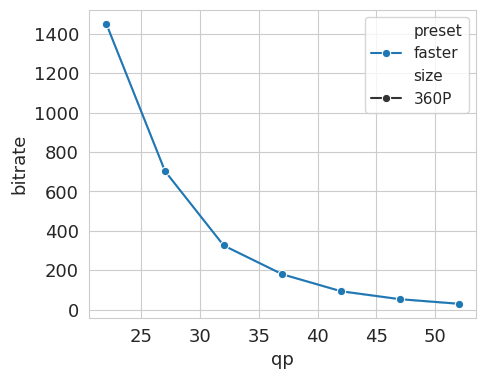

In [147]:
plt.figure(figsize=(5,4))
sns.lineplot(data=enc_df[(enc_df["preset"]=="faster") & (enc_df["size"] == "360P")], x="qp", y="bitrate", hue="preset", style="size", marker="o", errorbar=("ci", 0))

#### 2. 画一下 BDBR 性能

In [46]:
from matplotlib.ticker import MultipleLocator
bdbr = pd.read_csv(f"{table_dir}/BDBR/avg_rd_psnr.csv")

regressor_map = {
    'RMSProp': 'RMSProp',
    'LinearRegression': 'Linear',
    'LinearSVR': 'SVR',
    'Adam': 'EN',
    'RandomForestRegressor': 'RF',
    'SGDRegressor': 'MLP'
}
bdbr["regressor"] = bdbr["regressor"].map(regressor_map)

anchor_map = {
    'cae': 'vs orig CAE',
    'fixed': 'vs w/o CAE'
}
bdbr["anchor"] = bdbr["anchor"].map(anchor_map)

# 不看 Adam 和 RMSProp
bdbr = bdbr[(bdbr["regressor"] != "Adam") & (bdbr["regressor"] != "RMSProp")].reset_index(drop=True)
display(bdbr)

,regressor,func,input,bd_rate,bd_psnr,anchor
0,EN,linear,faster,3.772778,-0.135514,vs orig CAE
1,EN,linear,medium,2.458020,-0.085697,vs orig CAE
2,EN,linear,slower,2.174865,-0.091751,vs orig CAE
3,EN,power,faster,4.467159,-0.320569,vs orig CAE
4,EN,power,medium,4.952078,-0.349283,vs orig CAE
...,...,...,...,...,...,...
85,MLP,power,medium,-23.357237,0.937178,vs w/o CAE
86,MLP,power,slower,-23.507415,0.943927,vs w/o CAE
87,MLP,quadratic2,faster,-22.053749,1.118262,vs w/o CAE
88,MLP,quadratic2,medium,-22.190055,1.096946,vs w/o CAE


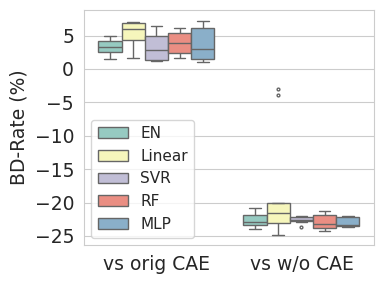

In [49]:
# 1. BD-Rate
plt.figure(figsize=(4, 3))
sns.boxplot(data=bdbr, x="anchor", y="bd_rate", hue="regressor", flierprops=flierprops, palette='Set3')
plt.xlabel("")
plt.ylabel("BD-Rate (%)")
plt.gca().yaxis.set_major_locator(MultipleLocator(5))

plt.legend(loc="lower left")
plt.tight_layout()
plt.savefig(f"{fig_dir}/BDBR/final/bdrate.pdf", format="pdf")

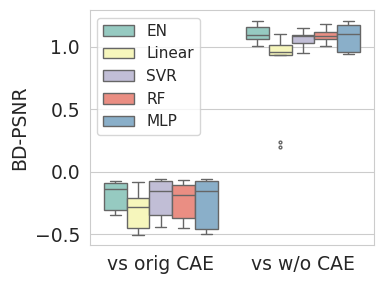

In [50]:
# 2. BD-PSNR
plt.figure(figsize=(4, 3))
sns.boxplot(data=bdbr, x="anchor", y="bd_psnr", hue="regressor", flierprops=flierprops, palette='Set3')
plt.xlabel("")
plt.ylabel("BD-PSNR")
plt.legend(loc="upper left")

plt.tight_layout()
plt.savefig(f"{fig_dir}/BDBR/final/bdpsnr.pdf", format="pdf")

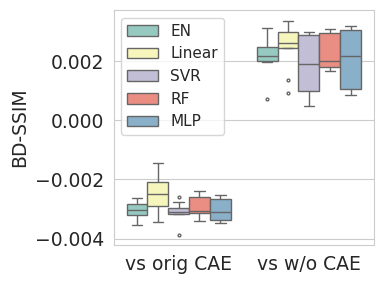

In [51]:
# 3. BD-SSIM
bdbr = pd.read_csv(f"{table_dir}/BDBR/avg_rd_ssim.csv")

regressor_map = {
    'RMSProp': 'RMSProp',
    'LinearRegression': 'Linear',
    'LinearSVR': 'SVR',
    'Adam': 'EN',
    'RandomForestRegressor': 'RF',
    'SGDRegressor': 'MLP'
}
bdbr["regressor"] = bdbr["regressor"].map(regressor_map)

anchor_map = {
    'cae': 'vs orig CAE',
    'fixed': 'vs w/o CAE'
}
bdbr["anchor"] = bdbr["anchor"].map(anchor_map)

# 不看 Adam 和 RMSProp
bdbr = bdbr[(bdbr["regressor"] != "Adam") & (bdbr["regressor"] != "RMSProp")].reset_index(drop=True)

plt.figure(figsize=(4, 3))
sns.boxplot(data=bdbr, x="anchor", y="bd_ssim", hue="regressor", flierprops=flierprops, palette='Set3')
plt.xlabel("")
plt.ylabel("BD-SSIM")
plt.legend(loc="upper left")

plt.tight_layout()
plt.savefig(f"{fig_dir}/BDBR/final/bdssim.pdf", format="pdf")

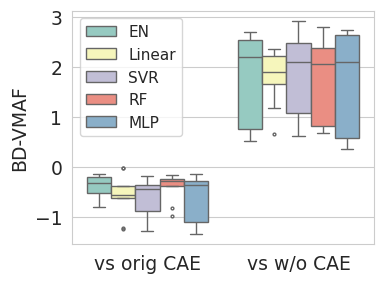

In [52]:
# 4. BD-VMAF
bdbr = pd.read_csv(f"{table_dir}/BDBR/avg_rd_vmaf.csv")

regressor_map = {
    'RMSProp': 'RMSProp',
    'LinearRegression': 'Linear',
    'LinearSVR': 'SVR',
    'Adam': 'EN',
    'RandomForestRegressor': 'RF',
    'SGDRegressor': 'MLP'
}
bdbr["regressor"] = bdbr["regressor"].map(regressor_map)

anchor_map = {
    'cae': 'vs orig CAE',
    'fixed': 'vs w/o CAE'
}
bdbr["anchor"] = bdbr["anchor"].map(anchor_map)

# 不看 Adam 和 RMSProp
bdbr = bdbr[(bdbr["regressor"] != "Adam") & (bdbr["regressor"] != "RMSProp")].reset_index(drop=True)

plt.figure(figsize=(4, 3))
sns.boxplot(data=bdbr, x="anchor", y="bd_vmaf", hue="regressor", flierprops=flierprops, palette='Set3')
plt.xlabel("")
plt.ylabel("BD-VMAF")
plt.legend(loc="upper left")

plt.tight_layout()
plt.savefig(f"{fig_dir}/BDBR/final/bdvmaf.pdf", format="pdf")

#### 3. 画一下预测精度

In [53]:
import re

rlt_dir  = "/home/zhaoy/asset-fastCAE/results/vvenc/tables/predCurve"
pred_rlts = pd.read_csv(f"{rlt_dir}/all_rlts.csv")
regressor_map = {
    'RMSProp': 'RMSProp',
    'LinearRegression': 'Linear',
    'LinearSVR': 'SVR',
    'Adam': 'EN',
    'RandomForestRegressor': 'RF',
    'SGDRegressor': 'MLP'
}
pred_rlts["regressor"] = pred_rlts["regressor"].map(regressor_map)

def extract_floats(s, pattern = r"[-+]?\d*\.\d+e?[-+]?\d*"):
    matches = re.findall(pattern, s)
    floats = [float(num) for num in matches]
    return pd.Series(floats)

pred_rlts[["p1_r2", "p2_r2"]] = pred_rlts["test_r2"].apply(extract_floats)
pred_rlts["test_r2"] = pred_rlts.apply(lambda x: max(x["p1_r2"], x["p2_r2"]), axis=1)

pred_rlts = pred_rlts[pred_rlts["target"].isin(["psnr", "ssim", "vmaf", "bitrate"])].reset_index(drop=True)
pred_rlts = pred_rlts[pred_rlts["regressor"].isin(["RF", "Linear", "SVR", "MLP", "EN"])].reset_index(drop=True)
display(pred_rlts)

,preset,input,regressor,train_rmse,train_r2,train_evs,test_rmse,test_r2,test_evs,func,target,p1_r2,p2_r2
0,medium,faster,RF,0.022573,[0.99924011 0.99927013],[0.99924019 0.99927033],1.189859,0.995592,[0.99616074 0.99508897],linear,bitrate,0.995592,0.993384
1,slower,faster,RF,0.023453,[0.99921221 0.99920314],[0.99921222 0.99920327],1.059084,0.995013,[0.99506518 0.9951115 ],linear,bitrate,0.995013,0.994484
2,medium,faster,Linear,0.036871,[0.99809781 0.99804983],[0.99809781 0.99804983],6.299066,0.840167,[0.84166681 0.82309188],linear,bitrate,0.840167,0.815481
3,slower,faster,Linear,0.041922,[0.9974836 0.99745407],[0.9974836 0.99745407],6.592542,0.787506,[0.91474446 0.92943334],linear,bitrate,0.748908,0.787506
4,medium,faster,SVR,0.344019,[0.80952331 0.83076143],[0.9588815 0.95655807],4.351284,0.912435,[0.95488135 0.95526711],linear,bitrate,0.912435,0.912203
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,medium,slower,SVR,0.000371,[0.94059558 0.94861147],[0.98028525 0.95355793],0.005612,0.975361,[0.97829573 0.96708131],quadratic2,vmaf,0.975361,0.963879
356,faster,slower,MLP,0.000407,[0.96878081 0.9439416 ],[0.97568744 0.9496944 ],0.006765,0.956836,[0.97482003 0.96806797],quadratic2,vmaf,0.954042,0.956836
357,medium,slower,MLP,0.000152,[0.9954993 0.99135382],[0.9956016 0.99137771],0.002153,0.995974,[0.99621581 0.99606168],quadratic2,vmaf,0.995974,0.994682
358,faster,slower,EN,0.000406,[0.96852247 0.9442161 ],[0.971235 0.95066258],0.010911,0.959367,[0.96078073 0.90030616],quadratic2,vmaf,0.959367,0.887595


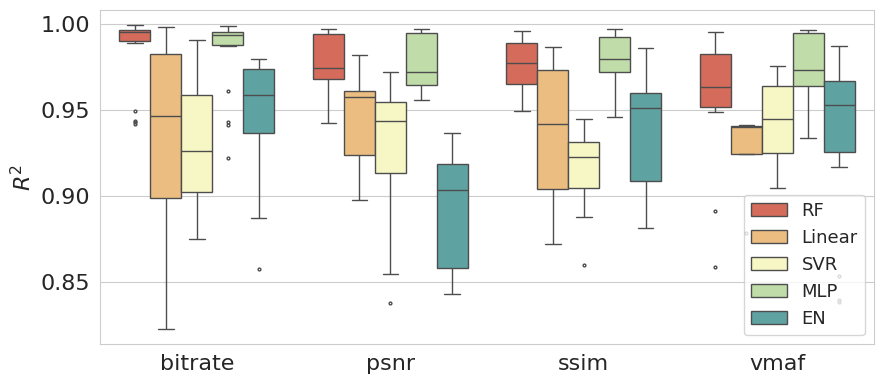

In [54]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=pred_rlts[(pred_rlts["test_r2"] > 0.82) & (pred_rlts["test_r2"] < 1.0)], 
            x="target", y="test_r2", hue="regressor", flierprops=flierprops, palette='Spectral')

plt.xlabel("")
plt.ylabel(r"$R^2$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks([0.85, 0.9, 0.95, 1.0], fontsize=16)
plt.legend(loc="lower right", fontsize=13)

plt.tight_layout()
plt.savefig(f"{fig_dir}/pred_r2.pdf", format="pdf")

#### 4. 画一下仅用 QP 拟合曲线时的 RD 性能

In [42]:
from matplotlib.ticker import MultipleLocator
bdbr = pd.read_csv(f"{table_dir}/BDBR-fitOnly/avg_rd_psnr.csv")

anchor_map = {
    'cae': 'vs orig CAE',
    'fixed': 'vs w/o CAE'
}
bdbr["anchor"] = bdbr["anchor"].map(anchor_map)

# 不看 Adam 和 RMSProp
bdbr = bdbr.reset_index(drop=True)
display(bdbr)

,anchor,func,preset,seqName,bd_rate,bd_psnr
0,vs orig CAE,linear,faster,Lecture-003a,4.393740,-0.209276
1,vs orig CAE,linear,faster,Lecture-07e0,2.572704,-0.117424
2,vs orig CAE,linear,faster,Lecture-10bc,2.303880,-0.090742
3,vs orig CAE,linear,faster,Lecture-11e7,0.747981,-0.036365
4,vs orig CAE,linear,faster,Lecture-181a,0.854652,-0.053759
...,...,...,...,...,...,...
544,vs w/o CAE,quadratic2,slower,Lecture-71d6,-31.763836,2.396921
545,vs w/o CAE,quadratic2,slower,Lecture-74cf,-34.063489,1.707495
546,vs w/o CAE,quadratic2,slower,Lecture-7a57,-22.904682,0.789844
547,vs w/o CAE,quadratic2,slower,Lecture-7e40,-32.348485,2.189383


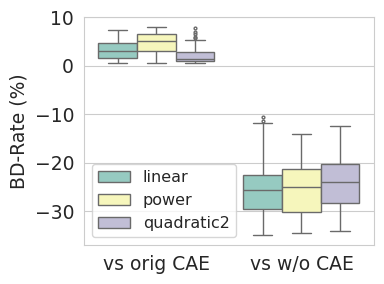

In [43]:
# # 1. BD-Rate
# plt.figure(figsize=(4, 3))
# sns.boxplot(data=bdbr, x="anchor", y="bd_rate", hue="func", flierprops=flierprops, palette='Set3')
# plt.xlabel("")
# plt.ylabel("BD-Rate (%)")
# plt.gca().yaxis.set_major_locator(MultipleLocator(10))
# 
# plt.legend(loc="lower left")
# plt.tight_layout()
# os.makedirs(f"{fig_dir}/BDBR-fitOnly/final", exist_ok=True)
# plt.savefig(f"{fig_dir}/BDBR-fitOnly/final/bdrate.pdf", format="pdf")

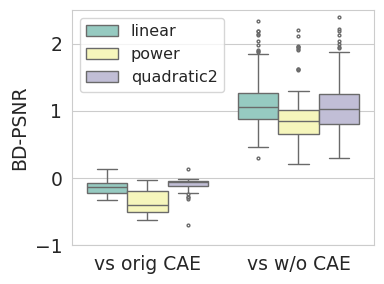

In [44]:
# # 2. BD-PSNR
# plt.figure(figsize=(4, 3))
# sns.boxplot(data=bdbr, x="anchor", y="bd_psnr", hue="func", flierprops=flierprops, palette='Set3')
# plt.xlabel("")
# plt.ylabel("BD-PSNR")
# plt.ylim(-1, 2.5)
# plt.legend(loc="upper left")
# 
# plt.tight_layout()
# plt.savefig(f"{fig_dir}/BDBR-fitOnly/final/bdpsnr.pdf", format="pdf")

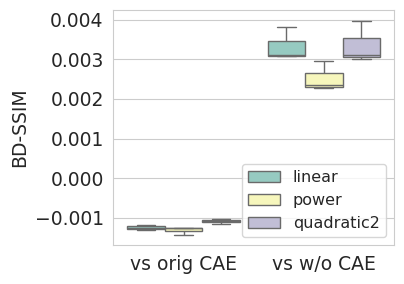

In [48]:
# # 3. BD-SSIM
# bdbr = pd.read_csv(f"{table_dir}/BDBR-fitOnly/avg_rd_ssim.csv")
# 
# func_map = {
#     "linear": "Linear",
#     "power":  "Power",
#     "quadratic2": "Quadratic"
# }
# anchor_map = {
#     'cae': 'vs orig CAE',
#     'fixed': 'vs w/o CAE'
# }
# bdbr["anchor"] = bdbr["anchor"].map(anchor_map)
# 
# plt.figure(figsize=(4.2, 3))
# sns.boxplot(data=bdbr, x="anchor", y="bd_ssim", hue="func", flierprops=flierprops, palette='Set3')
# plt.xlabel("")
# plt.ylabel("BD-SSIM")
# plt.legend(loc="lower right")
# 
# plt.tight_layout()
# plt.savefig(f"{fig_dir}/BDBR-fitOnly/final/bdssim.pdf", format="pdf")